In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


(112, 92)


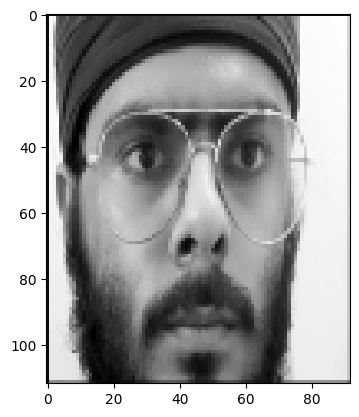

In [11]:
import matplotlib.image as mimg
import matplotlib.pyplot as plt
user_no = 41
img_no = 7
path = '/content/drive/MyDrive/orl_face/orl_face/u%d/%d.png'%(user_no,img_no)

im = mimg.imread(path)

plt.imshow(im,cmap = 'gray')
print(im.shape)

In [3]:
# convert the 2D-data of image into 1-D features
feat = im.reshape(1,-1)# shift all the values of the image
#into the columns in one single row
print(im.shape)
print(feat.shape)
print("range:",im.min(),'-',im.max())

(112, 92)
(1, 10304)
range: 0.0 - 0.83137256


In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.image as mimg
#to access all the saples of the data
to_samp = 420
data = np.zeros((to_samp,im.shape[0]*im.shape[1]))
label = np.zeros((to_samp))
images = np.zeros((to_samp,im.shape[0],im.shape[1]))
indx = -1

for i in range(1,43,1): #traverse for user
   for j in range(1,11,1): #traverse for id
    indx = indx+1
    #access single image
    usr_name = i
    samp_no = j
    path = "/content/drive/MyDrive/orl_face/orl_face/u%d/%d.png"%(usr_name,samp_no)

    #read image
    im = mimg.imread(path)
    feat = im.reshape(1,-1)
    data[indx,:] = feat
    label[indx] = i
    images[indx,:,:] = im
    print("user num ",i,'samp no',j,'processed...')# display the image

user num  1 samp no 1 processed...
user num  1 samp no 2 processed...
user num  1 samp no 3 processed...
user num  1 samp no 4 processed...
user num  1 samp no 5 processed...
user num  1 samp no 6 processed...
user num  1 samp no 7 processed...
user num  1 samp no 8 processed...
user num  1 samp no 9 processed...
user num  1 samp no 10 processed...
user num  2 samp no 1 processed...
user num  2 samp no 2 processed...
user num  2 samp no 3 processed...
user num  2 samp no 4 processed...
user num  2 samp no 5 processed...
user num  2 samp no 6 processed...
user num  2 samp no 7 processed...
user num  2 samp no 8 processed...
user num  2 samp no 9 processed...
user num  2 samp no 10 processed...
user num  3 samp no 1 processed...
user num  3 samp no 2 processed...
user num  3 samp no 3 processed...
user num  3 samp no 4 processed...
user num  3 samp no 5 processed...
user num  3 samp no 6 processed...
user num  3 samp no 7 processed...
user num  3 samp no 8 processed...
user num  3 samp n

In [14]:
from sklearn import svm
import pandas as pd
from sklearn import model_selection
from sklearn import metrics
X = data.copy()
y = label.copy()


# split the data into 70:30 ratio
Xtrain,Xtest,ytrain,ytest = model_selection.train_test_split(X,y,test_size=0.3,random_state=5)
print(Xtrain.shape,ytrain.shape)
print(Xtest.shape,ytest.shape)

ker = ['poly','linear','rbf']
c_value = [1,2,3]

# pre allocation of the result variable
result = np.zeros((len(ker),len(c_value)))
for i in range(len(ker)):
  for j in range(len(c_value)):
    # create the svm classifier
    orl_svm_model = svm.SVC(kernel=ker[i],gamma='scale',C=c_value[j])

    # train the model
    orl_svm_model = orl_svm_model.fit(Xtrain,ytrain)

    # predict the labels
    ypred = orl_svm_model.predict(Xtest)

    # accuracy
    acc = metrics.accuracy_score(ypred,ytest)
    #print("accuracy:", acc)
    result[i,j]=acc
print(result)

ResultDF = pd.DataFrame(result,index=ker,columns=["C=1","C=2","C=3"])
ResultDF

(294, 10304) (294,)
(126, 10304) (126,)
[[0.92063492 0.92063492 0.92063492]
 [0.93650794 0.93650794 0.93650794]
 [0.88095238 0.93650794 0.93650794]]


,C=1,C=2,C=3
poly,0.920635,0.920635,0.920635
linear,0.936508,0.936508,0.936508
rbf,0.880952,0.936508,0.936508


In [15]:
import joblib
# final best model
# kernel function - linear , C =1

orl_svm_model = svm.SVC(kernel='linear',gamma='scale',C=1)
# train the model
orl_svm_model = orl_svm_model.fit(Xtrain,ytrain)

# save the trained model
joblib.dump(orl_svm_model,'/content/drive/MyDrive/orl_face/orl_face_major_project_simar.pkl')

['/content/drive/MyDrive/orl_face/orl_face_major_project_simar.pkl']